# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv("loans.csv")

In [3]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


# Check Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


In [5]:
df.shape

(443, 8)


این دیتاست شامل 443 سطر و 8 ستون می باشد که دارای نوع داده ایی زیر هستند :  


1- float : `rate`  
2- int: `cliend_id`, `loan_amount`, `repaid`, `loan_id`  
3- object: `loan_start`, `loan_end`, `loan_type` 
_________

In [6]:
df.columns

Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')

In [7]:
df.nunique()

client_id       25
loan_type        4
loan_amount    438
repaid           2
loan_id        443
loan_start     430
loan_end       428
rate           336
dtype: int64

In [8]:
df.dtypes

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [9]:
# بررسی خلاصه ی آماری دیتاست
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client_id,443.0,38911.060948,7768.681063,25707.00,32885.00,39505.00,46109.00,49624.00
loan_amount,443.0,7982.311512,4172.891992,559.00,4232.50,8320.00,11739.00,14971.00
repaid,443.0,0.534989,0.499338,0.00,0.00,1.00,1.00,1.00
loan_id,443.0,11017.101580,581.826222,10009.00,10507.50,11033.00,11526.00,11991.00
rate,443.0,3.217156,2.397168,0.01,1.22,2.78,4.75,12.62


با توجه جدول آماری بالا , میتوان استنباط کرد که :  

1- `rate` : دارای چولگی راست می باشد  
2- `loan_amount`: تقریبا دارای چولگی متقارن می باشد

In [10]:
# بررسی مقادیر Nan
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [11]:
# بررسی مقادیر گمشده در سطر و ستون
df.isnull().any()

client_id      False
loan_type      False
loan_amount    False
repaid         False
loan_id        False
loan_start     False
loan_end       False
rate           False
dtype: bool

این دیتاست در سطر و ستون دارای مقادیر گم شده نمی باشد.

In [12]:
# بررسی مقادیر تکراری
df.duplicated().sum()

0

**با توجه به دو کد بالا , این دیتافریم دارای مقادیر گم شده و تکراری نمی باشد**

# Feature Engineering

In [13]:
# با توجه به اینکه این دو ستون دارای تاریخ هسنتد باید توع داده ایی آنها اصلاح شود
df['loan_start'] = pd.to_datetime(df['loan_start'])
df['loan_end'] = pd.to_datetime(df['loan_end'])

# استخراج ویژگی با محاسبه اختلاف بین دو ستون تاریخ شروع وام و پایان وام 
df['loan_duration'] = (df['loan_end'] - df['loan_start']).dt.days

**درمبحث سری زمانی ما میتوانیم ویژگی های زیر را هم نیز از تاریخ استخراج کنیم که در این تمرین به دلیل افزایش ویژگی ها و عدم نیاز و تاثیر این ویژگی های جدید بر روی مدل , این کد اجرا نشد**

```python
# استخراج ماه
df['start_month'] = df['loan_start'].dt.month
df['end_month'] = df['loan_end'].dt.month

# استخراج روز 
df['start_loan_day'] = df['loan_start'].dt.day
df['end_loan_day'] = df['loan_end'].dt.day

# استخراج سال
df['start_loan_year'] = df['loan_start'].dt.year
df['end_loan_year'] = df['loan_end'].dt.year
```

In [14]:
#محاسبه میزان مبلغی که مشتری می بایست بر اساس نرخ بهره بازپرداخت کند
rate = df['rate'] * 0.01
df['rate_amount'] = (df['loan_amount'] * rate)

In [15]:
# محاسبه مبلغ کلی که باید توسط مشتری به صورت ماهیانه پرداخت شود. این محاسبات شامل مبلغ بهره نیز می شود.
df['monthly_payment'] = (df['loan_amount'] + df['rate_amount']) / df['loan_duration'] * 30

ترکیب ستون ها زیر مبلغ کلی وام را نشان می دهد , یعنی میزان وام + مبلغ بهره :

```python
(df['loan_amount'] + df['rate_amount'])
```

In [16]:
# نسبت میزان سود به تعداد روز های که بزپرداخت وام طول کشیده است
df['rate_amount_loan_duration_ratio'] = df['rate_amount'] / df['loan_duration']

In [60]:
# بررسی مججد دیتافریم
df.head(2)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration_ratio
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613,293.948,683.488483,0.479524
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635,122.425,468.492520,0.192795


# Statistical Analysis

***در این بخش نمودار و تحلیل آماری بر روی دیتاست انجام میدهیم***

## `loan_amount`

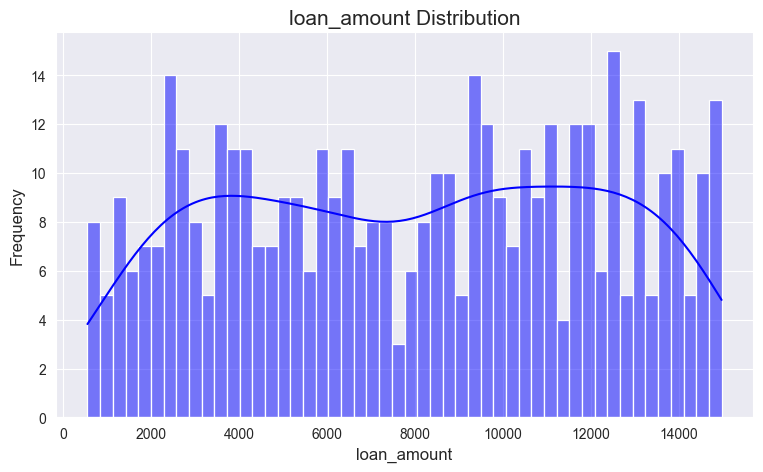

In [47]:
# بررسی توزیع ستون loan_amount
plt.figure(figsize=(9, 5))
sns.set_style('darkgrid')
sns.histplot(df['loan_amount'], bins=50, kde=True, color='blue')
plt.title("loan_amount Distribution", fontsize=15)
plt.xlabel("loan_amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

___بررسی معیار های آماری ستون `loan_amount`___

In [51]:
skew = df['loan_amount'].skew()
kurt = df['loan_amount'].kurt()
mean = df['loan_amount'].mean()
median = df['loan_amount'].median()
range = np.ptp(df['loan_amount'])

# Show reults
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: -0.0401
Kurtosis: -1.2321
Mean: 7982.3115
Median: 8320.0000
Range: 14412


## `rate`

___نمایش توزیع ستون `rate`___

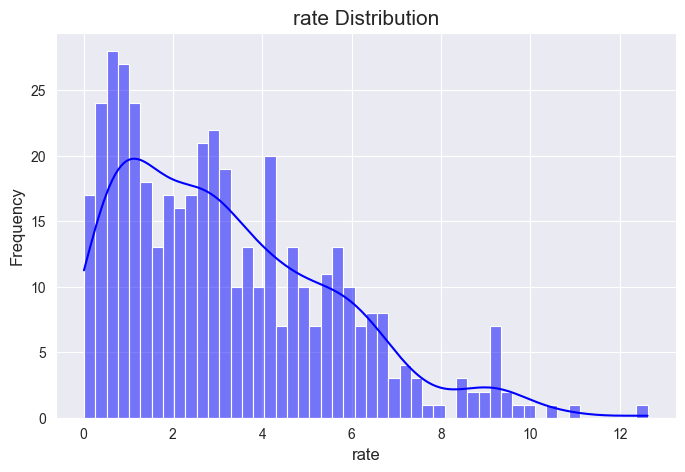

In [49]:
# بررسی توزیع ستون rate
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.histplot(df['rate'], bins=50, kde=True, color='blue')
plt.title("rate Distribution", fontsize=15)
plt.xlabel("rate", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

___بررسی معیار های آماری ستون rate___

In [58]:
skew = df['rate'].skew()
kurt = df['rate'].kurt()
mean = df['rate'].mean()
median = df['rate'].median()
range = np.ptp(df['rate'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 0.8842
Kurtosis: 0.4244
Mean: 3.2172
Median: 2.7800
Range: 12.61


## `rate_amount_loan_duration_ratio	`

___بررسی توزیع ستون `rate_amount_loan_duration_ratio`___

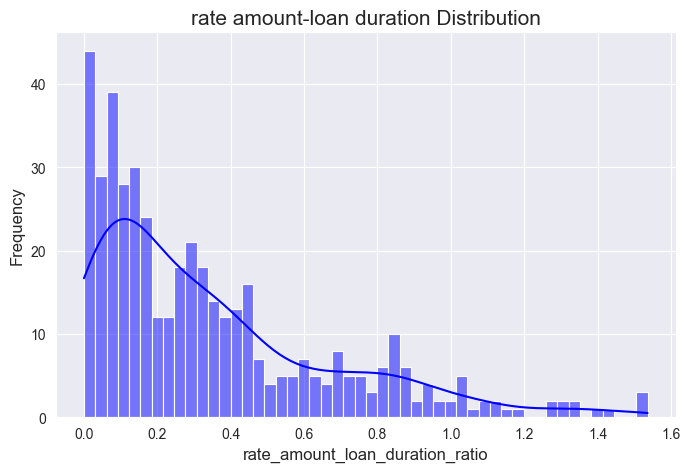

In [50]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.histplot(df['rate_amount_loan_duration_ratio'], bins=50, kde=True, color='blue')
plt.title("rate amount-loan duration Distribution", fontsize=15)
plt.xlabel("rate_amount_loan_duration_ratio", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

___بررسی معیار های آماری ستون `rate_amount_loan_duration_ratio`___

In [59]:
# بررسی چولگی و کورتوسیس ستون repaid_loan_duration_ratio
skew = df['rate_amount_loan_duration_ratio'].skew()
kurt = df['rate_amount_loan_duration_ratio'].kurt()
mean = df['rate_amount_loan_duration_ratio'].mean()
median = df['rate_amount_loan_duration_ratio'].median()
range = np.ptp(df['rate_amount_loan_duration_ratio'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 1.3156
Kurtosis: 1.3020
Mean: 0.3445
Median: 0.2507
Range: 1.5346909624343343


## `rate_amount`

___بررسی توزیع ستون `rate_amount`___

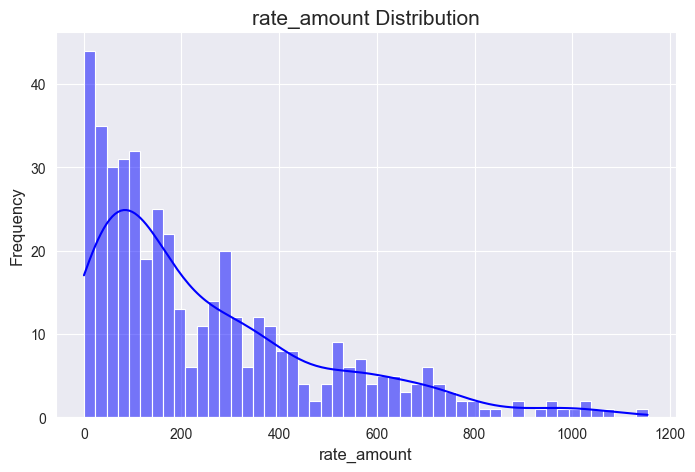

In [52]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.histplot(df['rate_amount'], bins=50, color='blue', kde=True)
plt.title("rate_amount Distribution", fontsize=15)
plt.xlabel("rate_amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

___بررسی معیار های آماری ستون `rate_amount`___

In [53]:
# بررسی چولگی و کورتوسیس ستون rate_amount
skew = df['rate_amount'].skew()
kurt = df['rate_amount'].kurt()
mean = df['rate_amount'].mean()
median = df['rate_amount'].median()
range = np.ptp(df['rate_amount'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 1.2810
Kurtosis: 1.1757
Mean: 253.4759
Median: 166.5927
Range: 1153.8099000000002


## `loan_duration`

___بررسی توزیع ستون `loan_duration`___

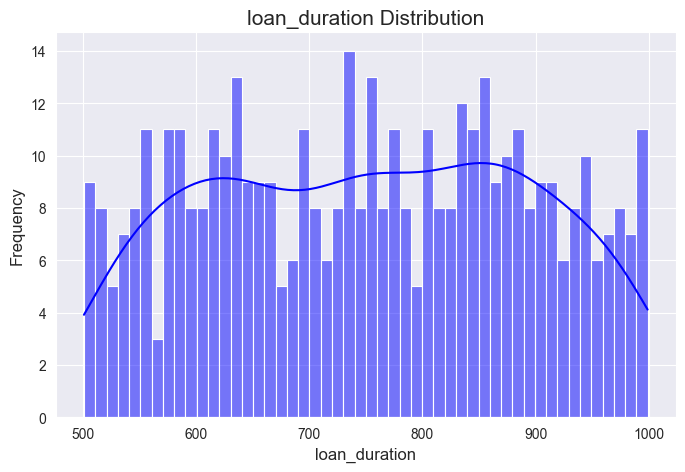

In [54]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.histplot(df['loan_duration'], bins=50, color='blue', kde=True)
plt.title("loan_duration Distribution", fontsize=15)
plt.xlabel("loan_duration", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

___بررسی معیار های آماری ستون `loan_duration`___

In [55]:
# بررسی چولگی و کورتوسیس ستون loan_duration
skew = df['loan_duration'].skew()
kurt = df['loan_duration'].kurt()
mean = df['loan_duration'].mean()
median = df['loan_duration'].median()
range = np.ptp(df['loan_duration'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: -0.0189
Kurtosis: -1.1457
Mean: 751.9436
Median: 754.0000
Range: 498


## `monthly_payment`

___بررسی توزیع ستون `monthly_payment`___

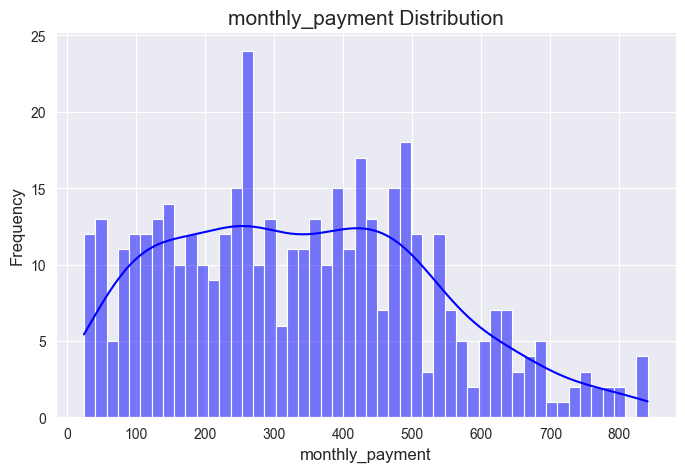

In [56]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.histplot(df['monthly_payment'], bins=50, color='blue', kde=True)
plt.title("monthly_payment Distribution", fontsize=15)
plt.xlabel("monthly_payment", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

___بررسی معیار های آماری ستون `monthly_payment`___

In [57]:
# بررسی چولگی و کورتوسیس ستون rate_amount
skew = df['monthly_payment'].skew()
kurt = df['monthly_payment'].kurt()
mean = df['monthly_payment'].mean()
median = df['monthly_payment'].median()
range = np.ptp(df['monthly_payment'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 0.3529
Kurtosis: -0.5574
Mean: 340.0206
Median: 329.0406
Range: 816.6754785499755


___________

## Regression Plot of `loan_amount` Vs `rate`

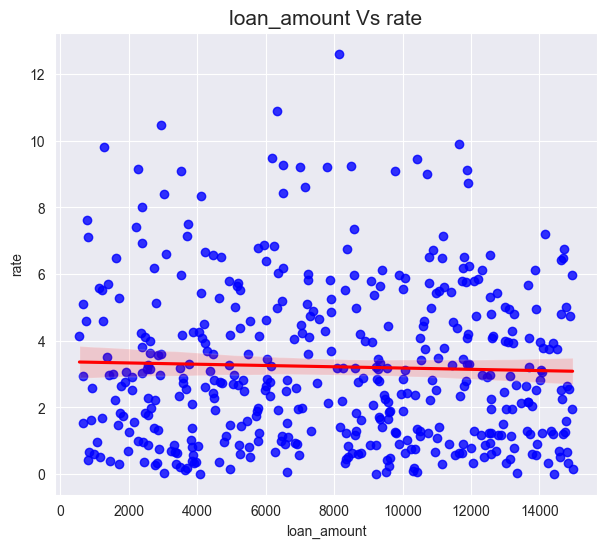

In [75]:
plt.figure(figsize=(7, 6))
sns.set_style('darkgrid')
sns.regplot(x='loan_amount', y="rate", data=df, color='blue', line_kws={'color': 'red'})
plt.title("loan_amount Vs rate", fontsize=15)
plt.xlabel("loan_amount", fontsize=10)
plt.ylabel("rate", fontsize=10)
plt.show()

## Regression Plot of `loan_amount` Vs `loan_duration`

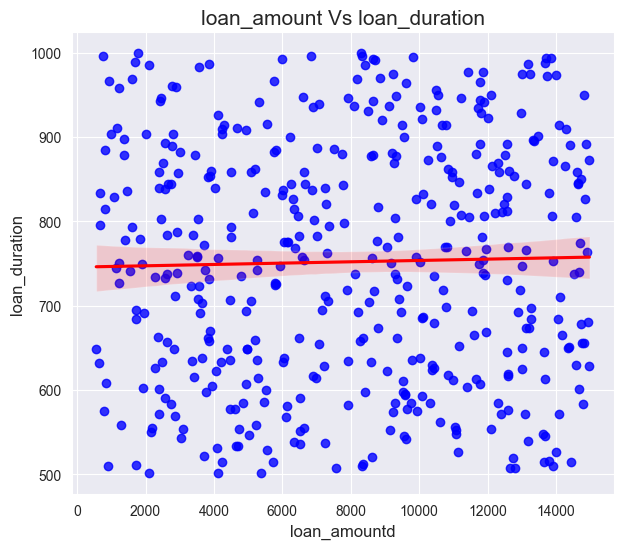

In [76]:
plt.figure(figsize=(7, 6))
sns.set_style('darkgrid')
sns.regplot(x='loan_amount', y="loan_duration", data=df, line_kws={"color":"red"}, color='blue')
plt.title("loan_amount Vs loan_duration", fontsize=15)
plt.xlabel("loan_amountd", fontsize=12)
plt.ylabel("loan_duration", fontsize=12)
plt.show()

## Regression Plot of `loan_amount` Vs `rate_amount`

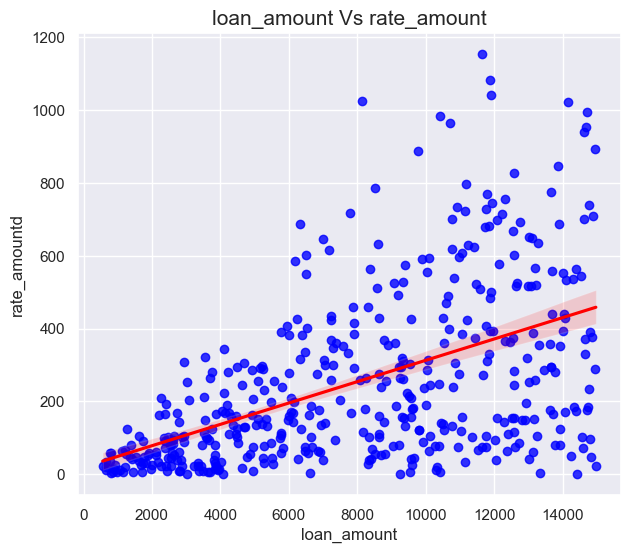

In [81]:
plt.figure(figsize=(7, 6))
sns.set(style='darkgrid')
sns.regplot(data=df, x='loan_amount', y='rate_amount', line_kws={"color":"red"}, color='blue')
plt.title("loan_amount Vs rate_amount", fontsize=15)
plt.xlabel("loan_amount", fontsize=12)
plt.ylabel("rate_amountd", fontsize=12)
plt.show()

## Regression Plot of `loan_amount` Vs `monthly_payment`

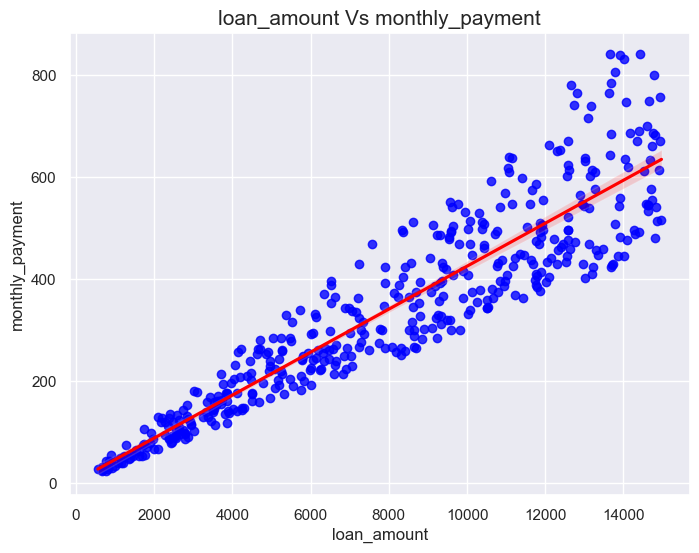

In [82]:
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')
sns.regplot(data=df, x='loan_amount', y='monthly_payment', line_kws={"color": "red"}, color="blue")
plt.title("loan_amount Vs monthly_payment", fontsize=15)
plt.xlabel("loan_amount", fontsize=12)
plt.ylabel("monthly_payment", fontsize=12)
plt.show()

## Regression plot of `loan_amount` Vs `rate_amount_loan_duration_ratio`

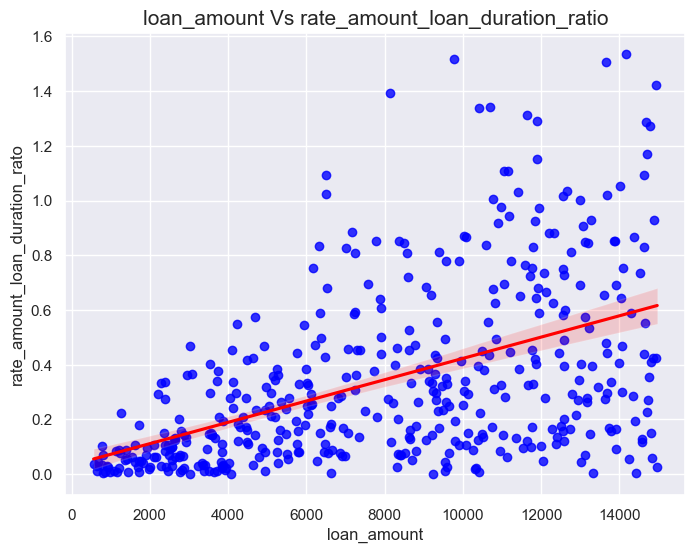

In [87]:
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')
sns.regplot(data=df, x='loan_amount', y='rate_amount_loan_duration_ratio', line_kws={"color": "red"}, color="blue")
plt.title("loan_amount Vs rate_amount_loan_duration_ratio", fontsize=15)
plt.xlabel("loan_amount", fontsize=12)
plt.ylabel("rate_amount_loan_duration_rato", fontsize=12)
plt.show()

## Repaid loans based on `loan_amount` and `rate`

**وام های بازپرداخت شده بر اساس دو ستون loan_amount و rate**

<Figure size 1000x600 with 0 Axes>

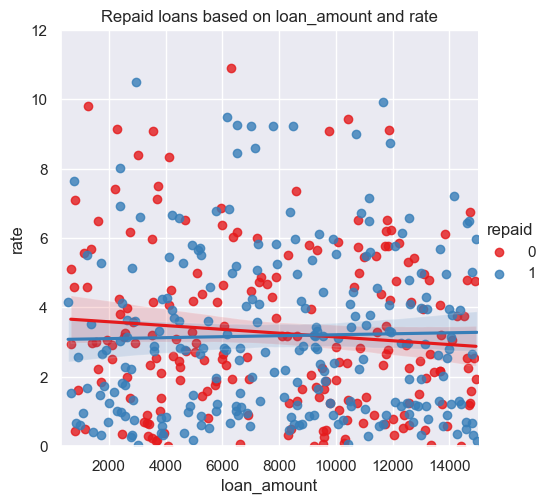

In [86]:
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
graph = sns.lmplot(x='loan_amount', y="rate", hue='repaid', data=df, palette='Set1')
graph.set(xlim=(300, 15000))
graph.set(ylim=(0, 12))
plt.title("Repaid loans based on loan_amount and rate", fontsize=12)
plt.xlabel("loan_amount", fontsize=12)
plt.ylabel("rate", fontsize=12)
plt.show()

بر اساس نمودار های رگرسیون بالا می توان نتیچه گرفت که ستون های زیر دارای همبستگی با هدف می باشند:

1- `monthly_payment` : میزان پرداخت ماهیانه  
2- `rate_amount` : میزان مبلغ سود بر اساس نرخ بهره  
3- `rate_amount_loan_duration_rato`: نسبت میزان سود بر مدت بازپرداخت وام  

___________________

## Countplot Of `loan_type`

**نمایش نمودار میله ایی ستون `loan_type`**

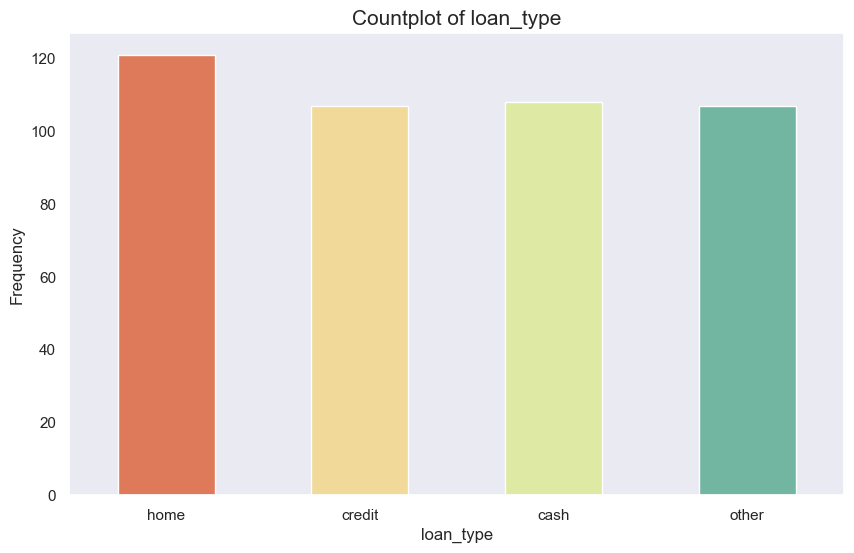

In [89]:
# بررسی مقادیر داده ایی در ستون loan_type
plt.figure(figsize=(10, 6))
sns.set_style('dark')
sns.countplot(data=df, x='loan_type', palette='Spectral', width=0.5)
plt.title("Countplot of loan_type", fontsize=15)
plt.xlabel("loan_type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## Countplot Of  `repaid`

**نمایش نمودار میله ایی ستون `repaid`**

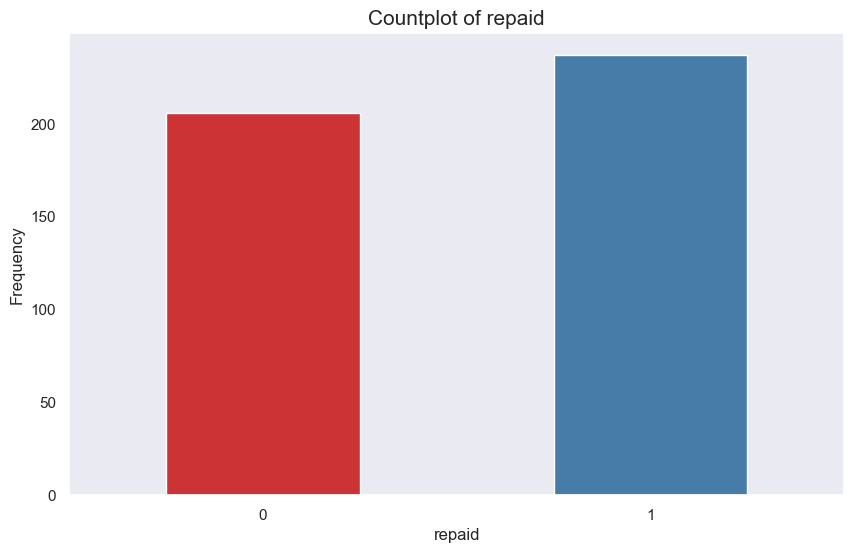

In [90]:
# بررسی مقادیر داده ایی در ستون loan_type
plt.figure(figsize=(10, 6))
sns.set_style('dark')
sns.countplot(data=df, x='repaid', palette='Set1', width=-0.5)
plt.title("Countplot of repaid", fontsize=15)
plt.xlabel("repaid", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

## `rate` Average over time

___بررسی میانگین نرخ بهره در طول زمان به صورت سالیانه___

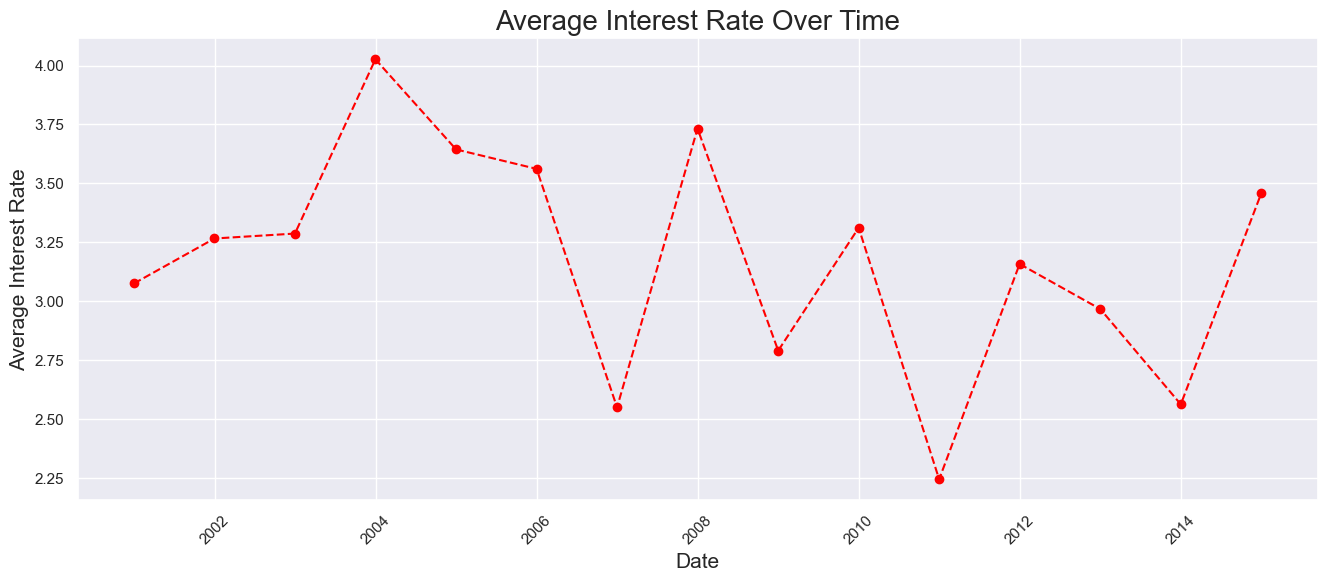

In [92]:
# محاسبه میانگین نرخ بهره برای هر دوره زمانی
interest_rates = df.groupby(pd.Grouper(key='loan_start', freq='Y'))['rate'].mean()

plt.figure(figsize=(16, 6))
sns.set_style('darkgrid')
plt.plot(interest_rates.index, interest_rates.values, marker='o', linestyle='--', color='red')
plt.title('Average Interest Rate Over Time', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Average Interest Rate', fontsize=15)
plt.xticks(rotation=45)
plt.show()

## Number of loans per year

___نمایش تعداد وام های داده شده در هر سال___

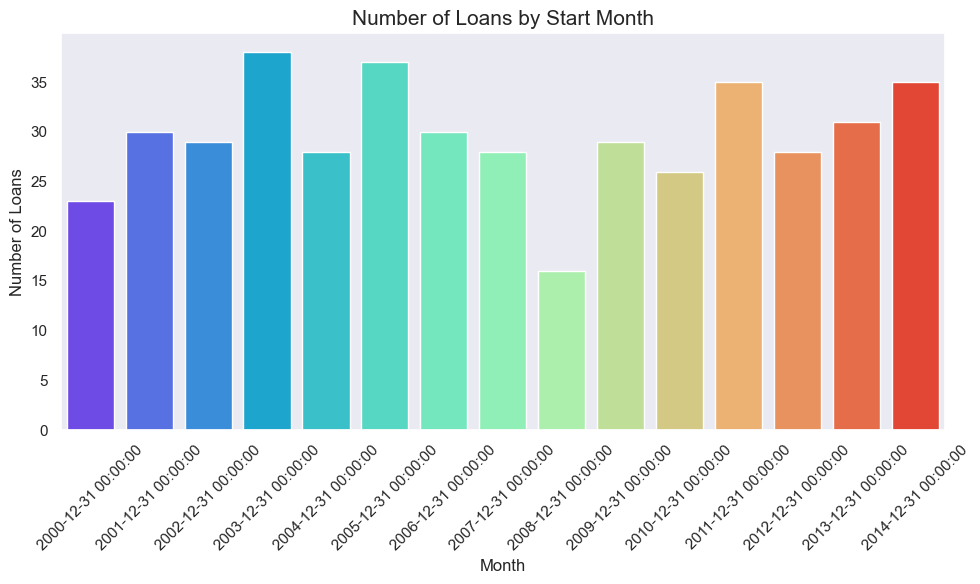

In [100]:
# بررسی تعداد وام‌ها بر اساس سال شروع وام

loan_counts_per_month = df.groupby(pd.Grouper(key='loan_start', freq='Y'))['loan_start'].count()

# رسم نمودار با استفاده از seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_counts_per_month.index, y=loan_counts_per_month.values, palette="rainbow")
plt.title('Number of Loans by Start Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

___________

**مشخص کردن تعداد وام ها و مجموع مبلغ و میانگین مبلاغ وام ها  دریافت شده توسط هر مشتری**

In [104]:
df.groupby('client_id')[['loan_amount']].agg(['size', 'sum', 'mean'])
# این کد میانگین , تعداد و مجموع وام های دریافت شده توسط هر مشتری را نمایش می دهد

loan_amount                      
                 size     sum          mean
client_id                                  
25707              20  159279   7963.950000
26326              16  116321   7270.062500
26695              18  140845   7824.722222
26945              15  106889   7125.933333
29841              18  176634   9813.000000
32726              19  126032   6633.263158
32885              15  148806   9920.400000
32961              17  133998   7882.235294
35089              20  138784   6939.200000
35214              18  129124   7173.555556
38537              17  152768   8986.352941
39384              19  149444   7865.473684
39505              20  148481   7424.050000
41472              16  120173   7510.812500
41480              20  157897   7894.850000
42320              15  105931   7062.066667
44387              15  110816   7387.733333
44601              20  137385   6869.250000
46109              20  179032   8951.600000
46180              20  154017   7700.850000
46958              13  121919   9378.384615
48177              19  141063   7424.368421
49068              18  137122   7617.888889
49545              20  205786  10289.300000
49624              15  137618   9174.533333

___نمایش معیار های آماری نرخ بهره بر اساس ستون های `repaid` و `loan_type`___

In [105]:
df.groupby(['loan_type', 'repaid'])[['rate']].agg(['mean', 'median', 'count'])
# این کد میانگین , میانه و تعداد وام های گرفته شده بر اساس ستون نوع وام و اینکه آیا بازپرداخت شده است یا خیر را مشخص می کند

rate             
                      mean median count
loan_type repaid                       
cash      0       2.938200  2.530    50
          1       3.154138  2.765    58
credit    0       3.011304  2.430    46
          1       3.630656  3.430    61
home      0       3.507385  3.140    65
          1       3.101964  2.395    56
other     0       3.508444  2.850    45
          1       2.835323  2.380    62

**میانگین مبلغ وام بر اساس نوع وام و وضعیت بازپرداخت**

In [107]:
df.pivot_table(index='loan_type', columns='repaid', values='loan_amount', aggfunc='mean')

repaid,0,1
loan_type,,
cash,7235.400000,8841.620690
credit,7859.086957,7104.819672
home,7937.353846,8092.910714
other,8747.155556,8127.661290


# Preprocessing

در این بخش موارد زیر انجام می شود

1- شناسایی و حذف داده های پرت و نویز  
2- کدگذاری داده های دسته ایی  
3- مقیاس بندی ویژگی های عدد  

## Detect Outliers

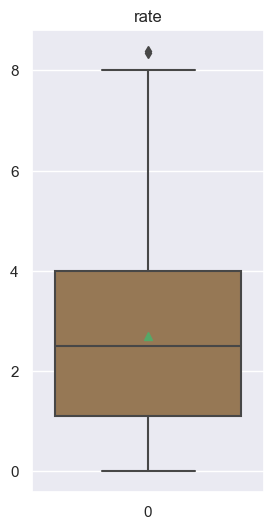

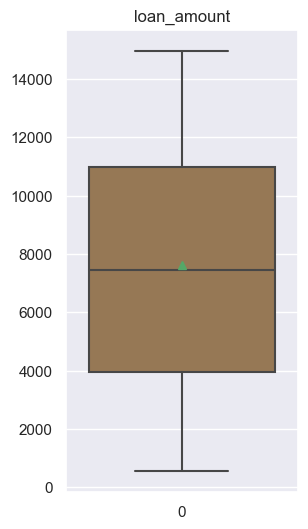

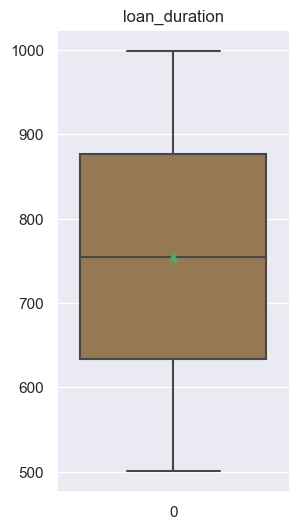

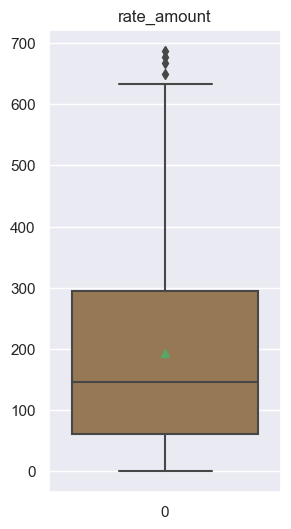

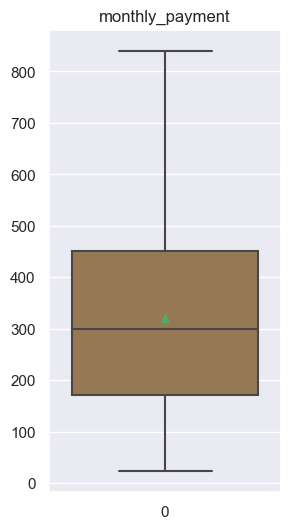

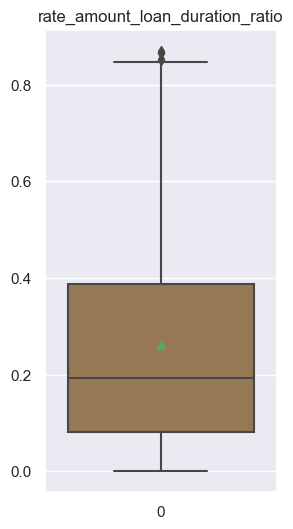

In [118]:
numeric_col = ['rate', 'loan_amount', 'loan_duration', 'rate_amount', 'monthly_payment', 'rate_amount_loan_duration_ratio']
for col in numeric_col:
    plt.figure(figsize=(3, 6))
    sns.boxplot(df[col], showmeans=True, palette='cubehelix')
    plt.title(f"{col}")
    plt.show()

بر اساس نمودار های بالا :
* `rate` : دارای داده های پرت می باشد
* `repaid_loan_duration_ratio` : دارای داده های پرت می باشد
* `repaid_amount`: دارای مقادیر پرت می باشد

### Remove Outliers Dataframe

In [115]:
def remove_outliers(df, column_name):
    """ این تابع نام ستون و دیتافریم را به عنوان ورودی دریافت میکند , 
    سپس داده های پرت را بر اساس متد IQR حذف می کند."""
    Q1 = np.quantile(df[column_name], 0.25)
    Q3 = np.quantile(df[column_name], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [116]:
# صدا زدن تابع و حذف داده های پرت
numeric_col = ['rate', 'loan_amount', 'loan_duration', 'rate_amount', 'monthly_payment', 'rate_amount_loan_duration_ratio']
for col in numeric_col:
    df = remove_outliers(df, col)

In [117]:
# ریست کردن ایندکس دیتافریم به دلیل حذف تعدادی از داده های پرت
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   client_id                        392 non-null    int64         
 1   loan_amount                      392 non-null    int64         
 2   repaid                           392 non-null    int64         
 3   loan_id                          392 non-null    int64         
 4   loan_start                       392 non-null    datetime64[ns]
 5   loan_end                         392 non-null    datetime64[ns]
 6   rate                             392 non-null    float64       
 7   loan_duration                    392 non-null    int64         
 8   rate_amount                      392 non-null    float64       
 9   monthly_payment                  392 non-null    float64       
 10  rate_amount_loan_duration_ratio  392 non-null    float64      

## Data Encoding for Categorical Features

**کد گذاری داده های دسته ایی**

In [112]:
# بررسی مقدار داده ها در ستون loan_type
df['loan_type'].value_counts()

loan_type
home      107
cash      104
other     103
credit    101
Name: count, dtype: int64

In [113]:
# به دلیل اینکه این ستون از نوع داده ایی ترتیبی نمی باشد از متد get_dummies برای کدگذاری این متغییر استفاده می کنیم.
df = pd.get_dummies(df, columns=['loan_type'], dtype='int')

In [114]:
# بررسی مجدد دیتافریم
df.sample(5)

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration_ratio,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
322,39384,11728,0,11700,2007-04-20,2009-11-09,5.78,934,677.8784,398.475752,0.725780,1,0,0,0
81,25707,12623,1,11790,2004-09-15,2007-01-23,4.09,860,516.2807,458.347001,0.600326,1,0,0,0
6,46109,6177,1,11141,2007-03-12,2009-04-26,9.48,776,585.5796,261.439933,0.754613,1,0,0,0
331,26695,11763,0,10048,2012-07-18,2014-12-27,3.45,892,405.8235,409.265364,0.454959,0,0,1,0
264,32885,11649,1,11610,2010-09-07,2012-05-12,0.64,613,74.5536,573.746506,0.121621,0,0,1,0


## Data Scaling

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
# Standardization
scaler = StandardScaler()
for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

In [125]:
df.head()

,client_id,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration_ratio,loan_type_cash,loan_type_credit,loan_type_home,loan_type_other
0,0.936568,1.473585,-1.074172,-1.298478,-1.229784,-1.313924,-0.290960,-1.001022,0.616529,1.972439,0.994619,-0.585206,-0.561637,1.720348,-0.581278
1,0.936568,0.530450,-1.074172,-0.030598,-0.881693,-0.953247,-0.760157,-0.844803,-0.429288,0.802279,-0.306997,-0.585206,1.780509,-0.581278,-0.581278
2,0.936568,1.245462,0.930949,-0.020332,-0.356725,-0.502871,-1.057315,-1.668503,-0.647776,2.285864,-0.424811,-0.585206,-0.561637,1.720348,-0.581278
3,0.936568,1.192931,0.930949,-0.694481,0.758047,0.833830,-0.765370,0.887807,-0.229310,0.606563,-0.380559,1.708801,-0.561637,-0.581278,-0.581278
4,0.936568,1.565272,0.930949,0.706860,0.661110,0.614915,0.219943,-0.496861,1.505420,1.711093,1.736207,-0.585206,1.780509,-0.581278,-0.581278


## Correlation Heatmap

**نمایش میزان همبستگی بین ویژگی های عددی دیتاست**

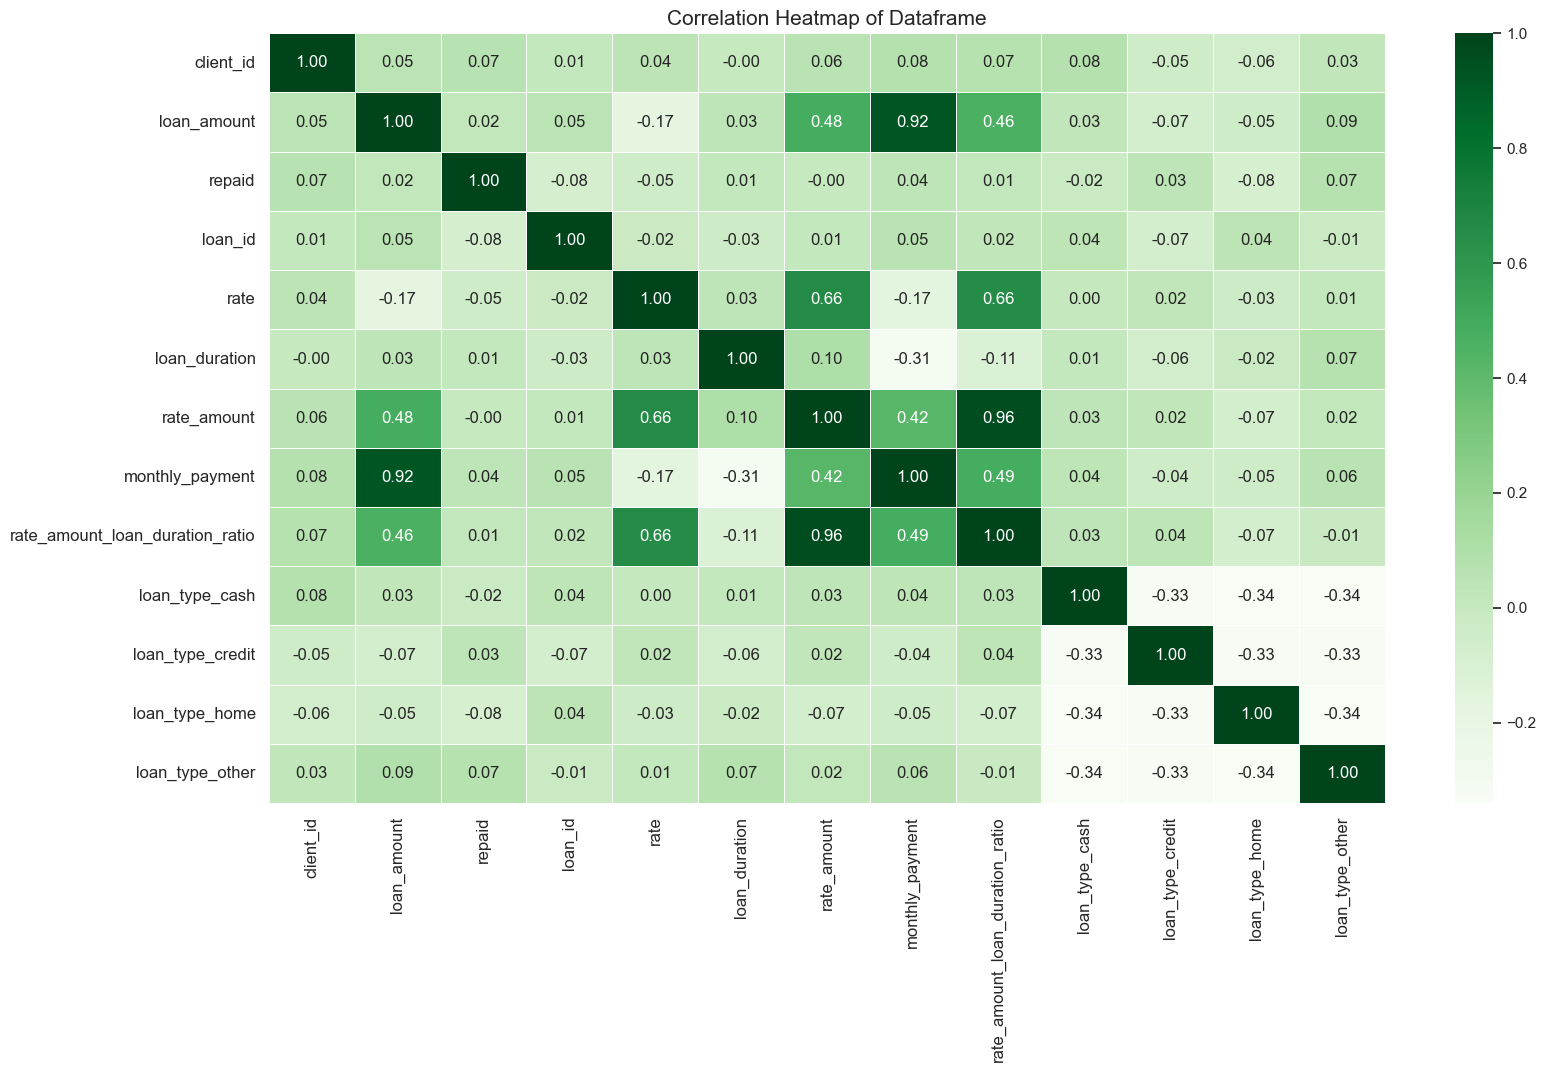

In [120]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=0.5, fmt='.2f', cmap='Greens')
plt.title("Correlation Heatmap of Dataframe", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

___براساس جدول بالا , ستون تارگت دارای همبستگی با ستون ها زیر می باشد:___
- rate_amount
- monthyly_payment
- rate_amount_loan_duration_ratio

# بخش دوم تمرین

In [129]:
# ایمپورت کردن کتابحانه ها
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

### انتخاب ستون های مورد نیاز

In [130]:
df_model = df[['loan_amount', 'repaid', 'rate', 'loan_duration', 'rate_amount', 'monthly_payment', 'rate_amount_loan_duration_ratio']]
df_model.head()
# در این کد ویژگی های مورد نیاز برای آموزش ماشین را در یک دیتافریم جدید ذخیره می کنیم

,loan_amount,repaid,rate,loan_duration,rate_amount,monthly_payment,rate_amount_loan_duration_ratio
0,1.473585,-1.074172,-0.290960,-1.001022,0.616529,1.972439,0.994619
1,0.530450,-1.074172,-0.760157,-0.844803,-0.429288,0.802279,-0.306997
2,1.245462,0.930949,-1.057315,-1.668503,-0.647776,2.285864,-0.424811
3,1.192931,0.930949,-0.765370,0.887807,-0.229310,0.606563,-0.380559
4,1.565272,0.930949,0.219943,-0.496861,1.505420,1.711093,1.736207


## SLR

In [133]:
# جدا کردن ویژگی ها و ستون هدف
X = df_model[['monthly_payment']]
y = df_model['loan_amount']

# ایجاد X_train , y_train
#ان طور که در بخش تقسیم داده های تست و آموزش مشخص کردیم , 20% داده ها را برای تست اختصاص دادیم. بنابراین داده تست دارای 88 سطر و 8 ستون هستند و داده های آموزش دارای 352 سطر و 8 ستون هستند
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create model object of LinearRegression Class
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# make new prediction based on test dataset
y_pred = model.predict(X_test)

# Check mse, r2 and score of model
r2 = r2_score(y_test, y_pred)
score = model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show Results
print(f"SLR MSE: {mse}")
print(f"SLR R-Squared: {r2}")
print(f"SLR Score: {score}")

SLR MSE: 0.14517140675170234
SLR R-Squared: 0.8447304363940857
SLR Score: 0.8520063758801754


## MLR

In [141]:
# Split data to X & y
features = ['monthly_payment', 'rate_amount', 'rate_amount_loan_duration_ratio']
X = df_model[features]
y = df_model['loan_amount']

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Object
mlr_model = LinearRegression()

# Training the Model
mlr_model.fit(X_train, y_train)

# Prediction
y_pred = mlr_model.predict(X_test)

# Check mse, r2 and score of model
r2 = r2_score(y_test, y_pred)
score = mlr_model.score(X, y)
mse = mean_squared_error(y_pred, y_test)

# Show results
print(f"MSE: {mse}")
print(f"R-Squared: {r2}")
print(f"Score: {score}")

MSE: 0.060924205652257236
R-Squared: 0.934837892417461
Score: 0.9468274179022945


## Polynomial Regression

In [142]:
features = ['monthly_payment', 'rate_amount', 'rate_amount_loan_duration_ratio']
# Split data to X & y
X = df[features]
y = df['loan_amount']

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Object
model = LinearRegression()
# create polynomial model from PolynomialFeature class
pf = PolynomialFeatures(degree=3)
X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

# traing the model
model.fit(X_train_poly, y_train)


# Make new prediction based on X_test_poly sets
y_pred = model.predict(X_test_poly)

# Check model performance by MSE & R2 and Score
mse = mean_squared_error(y_test, y_pred)
score = model.score(X_test_poly, y_test)
r2 = r2_score(y_test, y_pred)

# Show results
print(f"MSE: {mse}")
print(f"R-Squared: {r2}")
print(f"Score: {score}")

MSE: 0.018471288462598094
R-Squared: 0.9802438444112347
Score: 0.9802438444112347
